# NUS DSA presentation Notebook

In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

## Introduction of the Data

In [4]:
data = pd.read_csv("https://github.com/Purestreams/Academic-Success-Factors/raw/main/Student_performance.csv")
data = data.drop(columns=['StudentID'])
#data = data.drop(columns=['GradeClass'])
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<ul>
<li><strong>StudentID</strong>: A unique identifier assigned to each student (1001 to 3392).</li>
<li><strong>Age</strong>: The age of the students ranges from 15 to 18 years.</li>
<li><strong>Gender</strong>: Gender of the students, where 0 represents Male and 1 represents Female.</li>
<li><strong>Ethnicity</strong>: The ethnicity of the students, coded as follows:<ul>
<li>0: Caucasian</li>
<li>1: African American</li>
<li>2: Asian</li>
<li>3: Other</li></ul></li>
<li><strong>ParentalEducation</strong>: The education level of the parents, coded as follows:<ul>
<li>0: None</li>
<li>1: High School</li>
<li>2: Some College</li>
<li>3: Bachelor's</li>
<li>4: Higher</li></ul></li>
</ul>
<ul>
<li><strong>StudyTimeWeekly</strong>: Weekly study time in hours, ranging from 0 to 20.</li>
<li><strong>Absences</strong>: Number of absences during the school year, ranging from 0 to 30.</li>
<li><strong>Tutoring</strong>: Tutoring status, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<ul>
<li><strong>ParentalSupport</strong>: The level of parental support, coded as follows:<ul>
<li>0: None</li>
<li>1: Low</li>
<li>2: Moderate</li>
<li>3: High</li>
<li>4: Very High</li></ul></li>
</ul>
<ul>
<li><strong>Extracurricular</strong>: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>Sports</strong>: Participation in sports, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>Music</strong>: Participation in music activities, where 0 indicates No and 1 indicates Yes.</li>
<li><strong>Volunteering</strong>: Participation in volunteering, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<ul>
<li><strong>GPA</strong>: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.</li>
</ul>
<ul>
<li><strong>GradeClass</strong>: Classification of students' grades based on GPA:<ul>
<li>0: 'A' (GPA &gt;= 3.5)</li>
<li>1: 'B' (3.0 &lt;= GPA &lt; 3.5)</li>
<li>2: 'C' (2.5 &lt;= GPA &lt; 3.0)</li>
<li>3: 'D' (2.0 &lt;= GPA &lt; 2.5)</li>
<li>4: 'F' (GPA &lt; 2.0)</li></ul></li>
</ul>

In [6]:
# Check  missing values
data.isna().sum().sort_values(ascending=False)

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
# information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [8]:
# calculate the p-value for each variable
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues.loc[c,r] = round(sm.OLS(df[r], df[c]).fit().pvalues[c], 4)
    return pvalues

calculate_pvalues(data)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Absences,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ethnicity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extracurricular,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GradeClass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Music,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ParentalEducation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ParentalSupport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# calculate the correlation matrix
corr = data.corr()
corr

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


<BarContainer object of 13 artists>

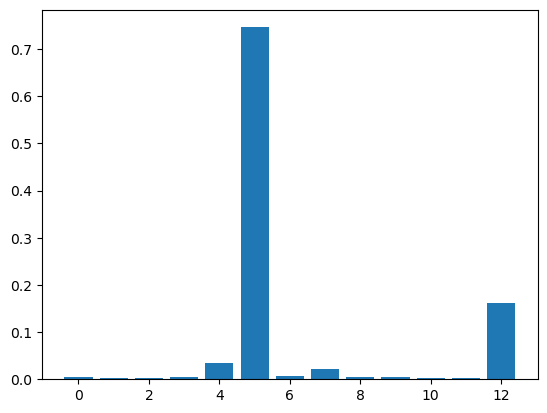

In [11]:
# calculate the importance scores for each variable
X = data.drop(columns=['GPA'])
y = data['GPA']

model = tree.DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_

plt.bar([x for x in range(len(importance))], importance)

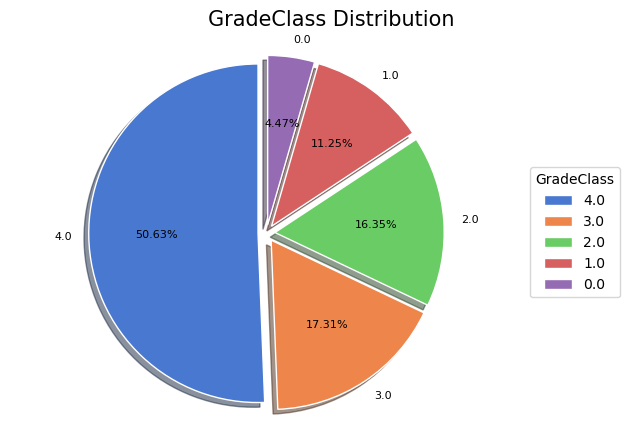

In [19]:
plt.pie(
    data['GradeClass'].value_counts(), 
    labels=data['GradeClass'].value_counts().index,
    autopct='%1.2f%%', 
    startangle=90, 
    shadow=True, explode=[0.05] * 5, 
    wedgeprops={'edgecolor': 'white',
                'linewidth': 1},
    colors=sns.color_palette('muted'),
    textprops={'fontsize': 8},
)


plt.legend(data['GradeClass'].value_counts().index, title="GradeClass", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.suptitle(
    '''     GradeClass Distribution
    ''', fontsize=15, y=0.9)

plt.axis('equal')
plt.tight_layout()
plt.show()

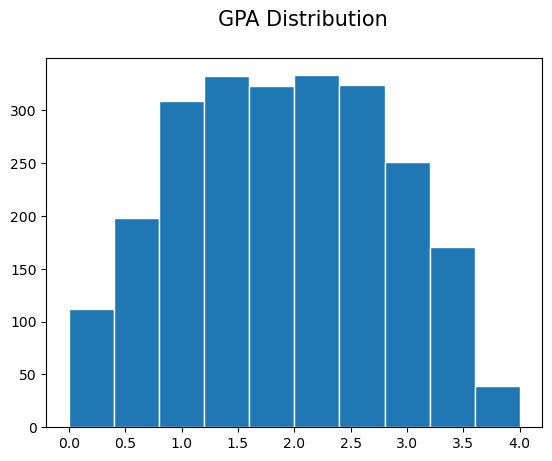

In [24]:
plt.hist(data["GPA"],edgecolor="white")
plt.suptitle(
    '''     GPA Distribution
    ''', fontsize=15)
plt.show()

# 1: How is performance dependent on Parental Education?

Categories: [2 1 3 4 0]
ANOVA result for math scores by parental education level: F-statistic = 0.6049, p-value = 0.6591
ANOVA result for reading scores by parental education level: F-statistic = 1.1897, p-value = 0.3133
ANOVA result for writing scores by parental education level: F-statistic = 0.1868, p-value = 0.9454


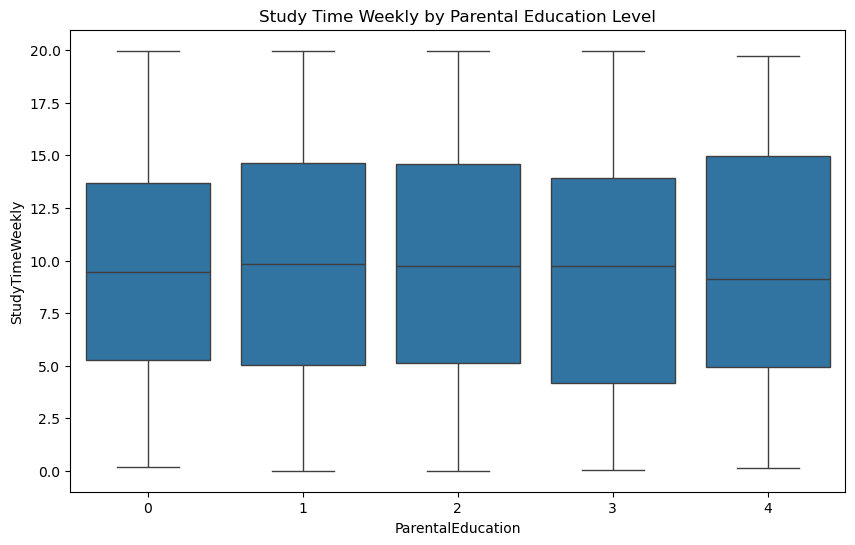

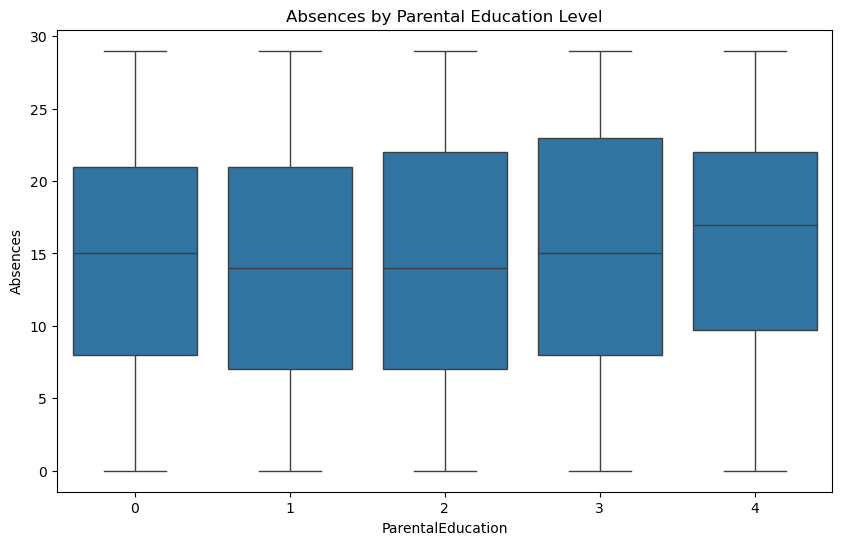

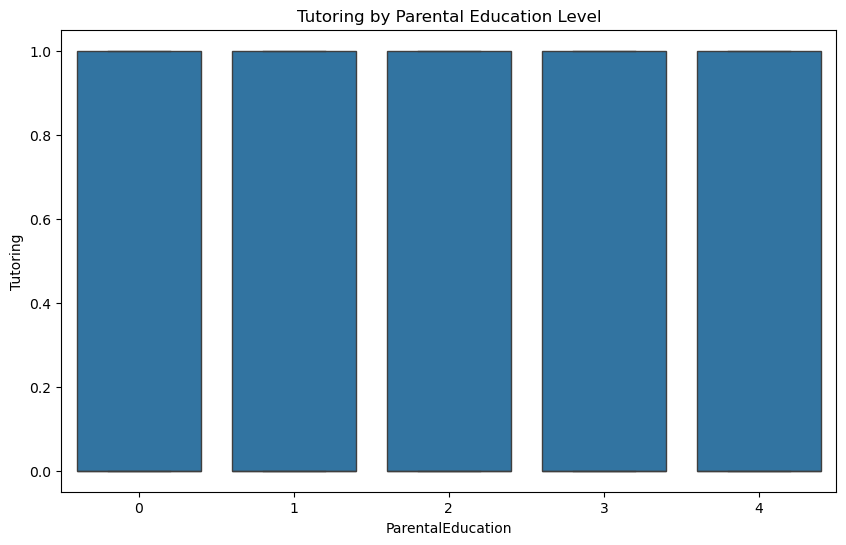

In [25]:
#Problem: Does parental education level significantly affect student performance?
from scipy import stats
import seaborn as sns

categories = data['ParentalEducation'].unique()
print("Categories:", categories)

# Perform ANOVA 
groups_Study = [data[data['ParentalEducation'] == category]['StudyTimeWeekly'] for category in categories]
anova_Study = stats.f_oneway(*groups_Study)
print(f"ANOVA result for math scores by parental education level: F-statistic = {anova_Study.statistic:.4f}, p-value = {anova_Study.pvalue:.4f}")


groups_Absences = [data[data['ParentalEducation'] == category]['Absences'] for category in categories]
anova_Absences = stats.f_oneway(*groups_Absences)
print(f"ANOVA result for reading scores by parental education level: F-statistic = {anova_Absences.statistic:.4f}, p-value = {anova_Absences.pvalue:.4f}")

 
groups_Tutoring = [data[data['ParentalEducation'] == category]['Tutoring'] for category in categories]
anova_Tutoring = stats.f_oneway(*groups_Tutoring)
print(f"ANOVA result for writing scores by parental education level: F-statistic = {anova_Tutoring.statistic:.4f}, p-value = {anova_Tutoring.pvalue:.4f}")

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='ParentalEducation', y='StudyTimeWeekly',data=data)
plt.title('Study Time Weekly by Parental Education Level')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='ParentalEducation', y='Absences',data=data)
plt.title('Absences by Parental Education Level')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x='ParentalEducation', y='Tutoring',data=data)
plt.title('Tutoring by Parental Education Level')
plt.show()


# Q2: Does/How Extracurricular activity impact GPA?

In [112]:
# Adding a constant for the intercept
data['Intercept'] = 1

# Define the dependent and independent variables for StudyTimeWeekly
X_Study = data[['Intercept', 'ParentalEducation', 'ParentalSupport', 'Extracurricular']]
y_Study = data['StudyTimeWeekly']

# Fit the OLS model for StudyTimeWeekly
model_Study = sm.OLS(y_Study, X_Study).fit()

# Print the summary for StudyTimeWeekly
print("Linear Regression for StudyTimeWeekly")
print(model_Study.summary())

# Define the dependent and independent variables for Absences
X_Absences = data[['Intercept', 'ParentalEducation', 'ParentalSupport', 'Extracurricular']]
y_Absences = data['Absences']

# Fit the OLS model for Absences
model_Absences = sm.OLS(y_Absences, X_Absences).fit()

# Print the summary for Absences
print("\nLinear Regression for Absences")
print(model_Absences.summary())

# Define the dependent and independent variables for Tutoring
X_Tutoring = data[['Intercept', 'ParentalEducation', 'ParentalSupport', 'Extracurricular']]
y_Tutoring = data['Tutoring']

# Fit the OLS model for Tutoring
model_Tutoring = sm.OLS(y_Tutoring, X_Tutoring).fit()

# Print the summary for Tutoring
print("\nLinear Regression for Tutoring")
print(model_Tutoring.summary())

# Adding interaction terms for StudyTimeWeekly
data['Education_Support_Interaction'] = data['ParentalEducation'] * data['ParentalSupport']

X_Study_interact = data[['Intercept', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Education_Support_Interaction']]
y_Study_interact = data['StudyTimeWeekly']

# Fit the OLS model with interaction terms for StudyTimeWeekly
model_Study_interact = sm.OLS(y_Study_interact, X_Study_interact).fit()

# Print the summary for StudyTimeWeekly with interaction terms
print("\nLinear Regression for StudyTimeWeekly with Interaction Terms")
print(model_Study_interact.summary())

Linear Regression for StudyTimeWeekly
                            OLS Regression Results                            
Dep. Variable:        StudyTimeWeekly   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.512
Date:                Mon, 15 Jul 2024   Prob (F-statistic):              0.209
Time:                        14:04:55   Log-Likelihood:                -7534.6
No. Observations:                2392   AIC:                         1.508e+04
Df Residuals:                    2388   BIC:                         1.510e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


In [27]:
df = data
df1 = df[df['Ethnicity'] == 0]
df2 = df[df['Ethnicity'] == 1]
df3 = df[df['Ethnicity'] == 2]
df4 = df[df['Ethnicity'] == 3]

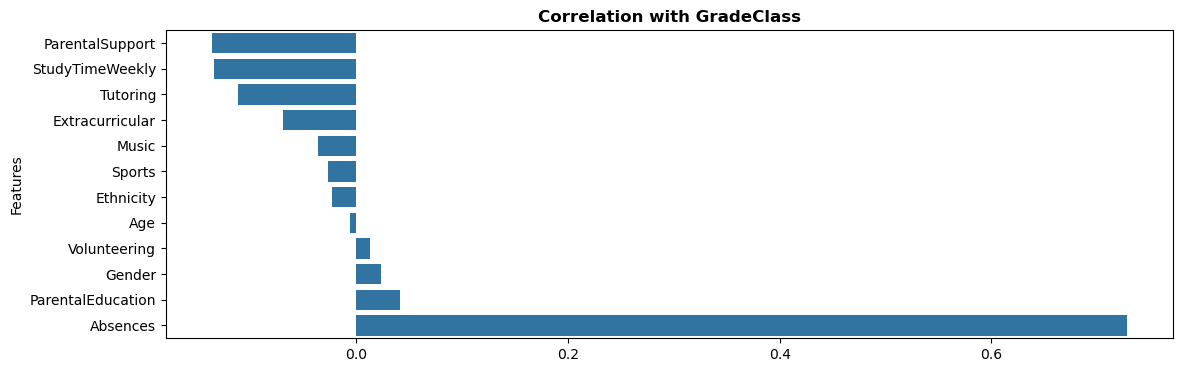

In [29]:
dff = df
dff = dff.apply(pd.to_numeric, errors='coerce')
dff = dff.drop(columns=['GPA'])
cor = dff.iloc[:,:-1].corrwith(dff['GradeClass']).sort_values()
plt.figure(figsize=(13, 4))
ax = sns.barplot(x=cor.values, y=cor.index)
plt.title('Correlation with GradeClass', fontsize=12, weight='semibold')
ax.set_ylabel('Features')
plt.show()

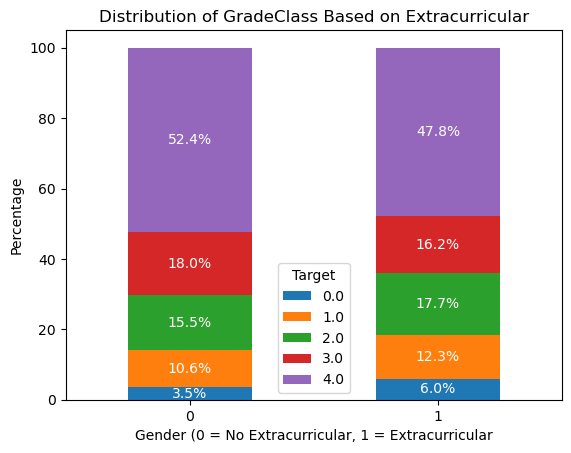

In [30]:
crosstab_gender = pd.crosstab(df['Extracurricular'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100

ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Extracurricular, 1 = Extracurricular')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Extracurricular')
plt.legend(title='Target')
plt.xticks(rotation=0)

for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')

plt.show()

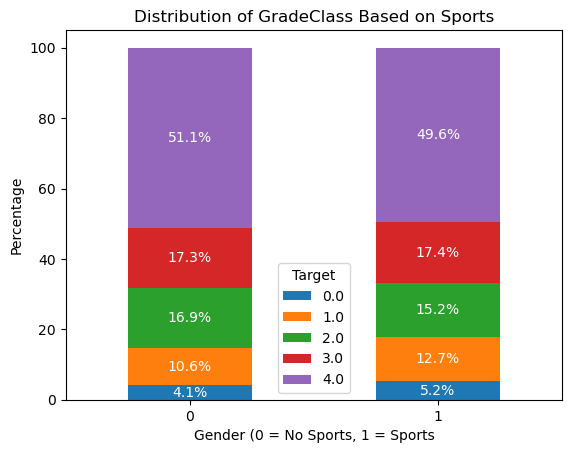

In [31]:
crosstab_gender = pd.crosstab(df['Sports'], df['GradeClass'])
crosstab_gender = crosstab_gender.div(crosstab_gender.sum(axis=1), axis=0) * 100

ax_gender = crosstab_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender (0 = No Sports, 1 = Sports')
plt.ylabel('Percentage')
plt.title('Distribution of GradeClass Based on Sports')
plt.legend(title='Target')
plt.xticks(rotation=0)

for p in ax_gender.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax_gender.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                ha='center', va='center', fontsize=10, color='white')

plt.show()

In [36]:
#define ActivityLevel

df['ActivityLevel'] = df['Extracurricular'] + df['Sports'] + df['Music'] + df['Volunteering']

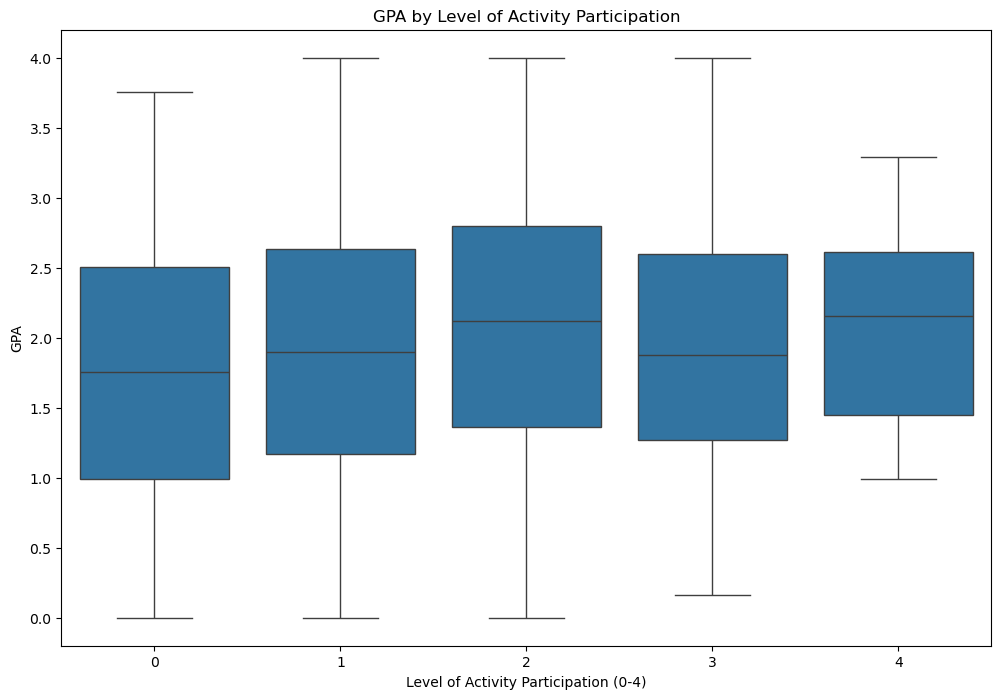

F-statistic: 10.770561066226234
P-value: 1.1851855065442135e-08
There is a statistically significant difference in GPA across different levels of activity participation.


In [37]:
# Boxplot to visualize the relationship between GPA and levels of activity participation
plt.figure(figsize=(12, 8))
sns.boxplot(x='ActivityLevel', y='GPA', data=df)
plt.title('GPA by Level of Activity Participation')
plt.xlabel('Level of Activity Participation (0-4)')
plt.ylabel('GPA')
plt.show()

# Prepare data for ANOVA
levels = df['ActivityLevel'].unique()
groups = [df[df['ActivityLevel'] == level]['GPA'] for level in levels]

# Conducting ANOVA
anova_result = stats.f_oneway(*groups)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in GPA across different levels of activity participation.")
else:
    print("There is no statistically significant difference in GPA across different levels of activity participation.")

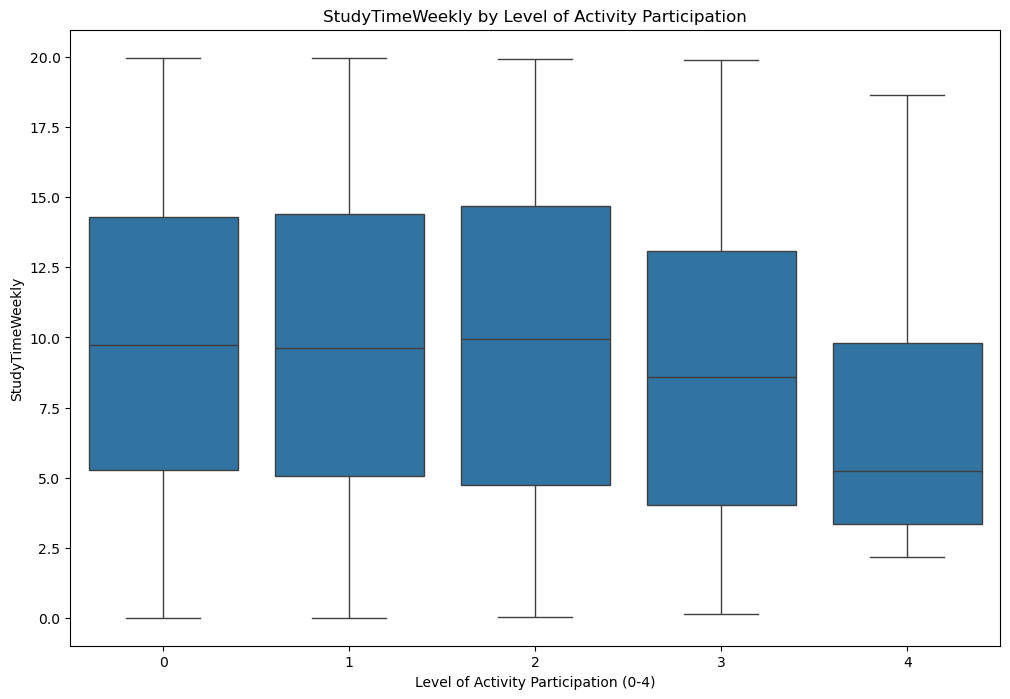

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ActivityLevel', y='StudyTimeWeekly', data=df)
plt.title('StudyTimeWeekly by Level of Activity Participation')
plt.xlabel('Level of Activity Participation (0-4)')
plt.ylabel('StudyTimeWeekly')
plt.show()

In [48]:
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}
df['EthnicityName'] = df['Ethnicity'].map(ethnicity_mapping)
grouped_stats = df.groupby(['EthnicityName', 'ActivityLevel'])['GPA'].describe()
print(grouped_stats)

                                count      mean       std       min       25%  \
EthnicityName    ActivityLevel                                                  
African American 0              135.0  1.741205  0.890834  0.000000  1.033011   
                 1              223.0  2.011799  0.939757  0.000000  1.347208   
                 2              109.0  2.086923  0.922472  0.223431  1.353723   
                 3               23.0  1.891144  0.900514  0.165111  1.088333   
                 4                3.0  1.642888  1.089929  0.992297  1.013739   
Asian            0              138.0  1.752277  0.911900  0.000000  1.035352   
                 1              188.0  1.878953  0.928783  0.000000  1.143085   
                 2              117.0  2.183067  0.862924  0.415931  1.548710   
                 3               27.0  1.960097  0.886923  0.779552  1.181760   
Caucasian        0              333.0  1.739631  0.909237  0.000000  0.954788   
                 1          

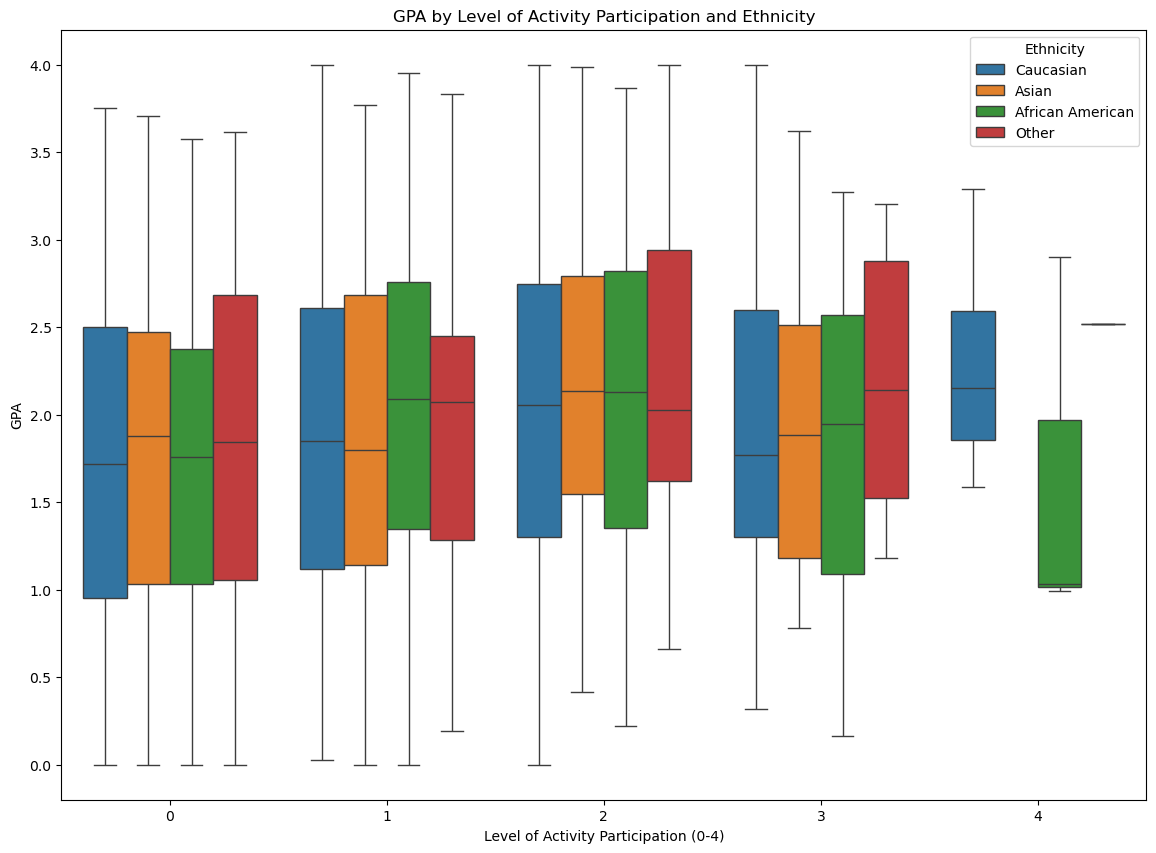

Analysis for Ethnicity: Caucasian
F-statistic: 4.64, P-value: 0.0010

Analysis for Ethnicity: Asian
F-statistic: 5.02, P-value: 0.0020

Analysis for Ethnicity: African American
F-statistic: 2.69, P-value: 0.0306

Analysis for Ethnicity: Other
F-statistic: 1.18, P-value: 0.3221

Caucasian: F-statistic = 4.64, P-value = 0.0010
Asian: F-statistic = 5.02, P-value = 0.0020
African American: F-statistic = 2.69, P-value = 0.0306
Other: F-statistic = 1.18, P-value = 0.3221


In [57]:
# Visualize the relationship between Activity Level and GPA for each ethnicity
plt.figure(figsize=(14, 10))
sns.boxplot(x='ActivityLevel', y='GPA', hue='EthnicityName', data=df)
plt.title('GPA by Level of Activity Participation and Ethnicity')
plt.xlabel('Level of Activity Participation (0-4)')
plt.ylabel('GPA')
plt.legend(title='Ethnicity')
plt.show()

# Analyze the relationship within each ethnic group using ANOVA
results = {}
for ethnicity in df['Ethnicity'].unique():
    print(f"Analysis for Ethnicity: {ethnicity_mapping[ethnicity]}")
    subgroup = df[df['Ethnicity'] == ethnicity]
    levels = subgroup['ActivityLevel'].unique()
    groups = [subgroup[subgroup['ActivityLevel'] == level]['GPA'] for level in levels]
    anova_result = f_oneway(*groups)
    results[ethnicity_mapping[ethnicity]] = (anova_result.statistic, anova_result.pvalue)
    print(f"F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}\n")

# Display summarized results
for eth, res in results.items():
    print(f"{eth}: F-statistic = {res[0]:.2f}, P-value = {res[1]:.4f}")

In [58]:
model = smf.ols('GPA ~ Extracurricular+Sports+Music+Volunteering', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.00
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           7.73e-09
Time:                        12:01:04   Log-Likelihood:                -3159.7
No. Observations:                2392   AIC:                             6329.
Df Residuals:                    2387   BIC:                             6358.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7649      0.029     59.838      0.000       1.707       1.823
Extracurricular     0.1805      0.038      4.727      0.000       0.106       0.255
Sports              0.1205      0.040      2.985      0.003       0.041       0.200
Music               0.1746      0.047      3.739      0.000       0.083       0.266
Volunteering        0.0071      0.051      0.140      0.889      -0.093       0.107
==============================================================================
Omnibus:                      345.422   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.437
Skew:                           0.011   Prob(JB):                     7.62e-19
Kurtosis:                       2.085   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model_1 = smf.ols('GPA ~ Extracurricular+Sports+Music+Volunteering', data=df1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.752
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           0.000138
Time:                        12:01:13   Log-Likelihood:                -1591.8
No. Observations:                1207   AIC:                             3194.
Df Residuals:                    1202   BIC:                             3219.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7398      0.042     41.613      0.000       1.658       1.822
Extracurricular     0.1558      0.054      2.889      0.004       0.050       0.262
Sports              0.1327      0.057      2.334      0.020       0.021       0.244
Music               0.2029      0.065      3.131      0.002       0.076       0.330
Volunteering       -0.0258      0.072     -0.358      0.721      -0.168       0.116
==============================================================================
Omnibus:                      188.086   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.552
Skew:                           0.056   Prob(JB):                     2.12e-10
Kurtosis:                       2.066   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model_2 = smf.ols('GPA ~ Extracurricular+Sports+Music+Volunteering', data=df2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.233
Date:                Mon, 15 Jul 2024   Prob (F-statistic):              0.296
Time:                        12:01:21   Log-Likelihood:                -659.69
No. Observations:                 493   AIC:                             1329.
Df Residuals:                     488   BIC:                             1350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8312      0.067     27.281      0.000       1.699       1.963
Extracurricular     0.1415      0.085      1.674      0.095      -0.025       0.308
Sports              0.0718      0.091      0.789      0.431      -0.107       0.251
Music               0.1103      0.108      1.022      0.308      -0.102       0.322
Volunteering        0.0877      0.119      0.737      0.461      -0.146       0.322
==============================================================================
Omnibus:                       46.442   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.046
Skew:                          -0.084   Prob(JB):                     0.000541
Kurtosis:                       2.161   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model_3 = smf.ols('GPA ~ Extracurricular+Sports+Music+Volunteering', data=df3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.324
Date:                Mon, 15 Jul 2024   Prob (F-statistic):             0.0106
Time:                        12:01:32   Log-Likelihood:                -619.07
No. Observations:                 470   AIC:                             1248.
Df Residuals:                     465   BIC:                             1269.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7469      0.066     26.279      0.000       1.616       1.878
Extracurricular     0.2470      0.087      2.850      0.005       0.077       0.417
Sports              0.1422      0.090      1.574      0.116      -0.035       0.320
Music               0.1746      0.105      1.660      0.098      -0.032       0.381
Volunteering        0.0138      0.110      0.125      0.900      -0.202       0.230
==============================================================================
Omnibus:                       69.800   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.316
Skew:                           0.001   Prob(JB):                     0.000174
Kurtosis:                       2.060   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_4 = smf.ols('GPA ~ Extracurricular+Sports+Music+Volunteering', data=df4)
result_4 = model_2.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.233
Date:                Mon, 15 Jul 2024   Prob (F-statistic):              0.296
Time:                        12:01:40   Log-Likelihood:                -659.69
No. Observations:                 493   AIC:                             1329.
Df Residuals:                     488   BIC:                             1350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8312      0.067     27.281      0.000       1.699       1.963
Extracurricular     0.1415      0.085      1.674      0.095      -0.025       0.308
Sports              0.0718      0.091      0.789      0.431      -0.107       0.251
Music               0.1103      0.108      1.022      0.308      -0.102       0.322
Volunteering        0.0877      0.119      0.737      0.461      -0.146       0.322
==============================================================================
Omnibus:                       46.442   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.046
Skew:                          -0.084   Prob(JB):                     0.000541
Kurtosis:                       2.161   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['LogActivityLevel'] = np.log1p(df['ActivityLevel'])

# Features and Target using the transformed 'LogActivityLevel'
X = df[['LogActivityLevel']]  # Transformed feature
y = df['GPA']                 # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model5 = LinearRegression()
model5.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model5.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Displaying the model coefficients
print(f'Intercept: {model5.intercept_:.2f}')
print(f'Coefficient for LogActivityLevel: {model5.coef_[0]:.2f}')

Mean Squared Error: 0.83
R^2 Score: 0.00
Intercept: 1.72
Coefficient for LogActivityLevel: 0.29


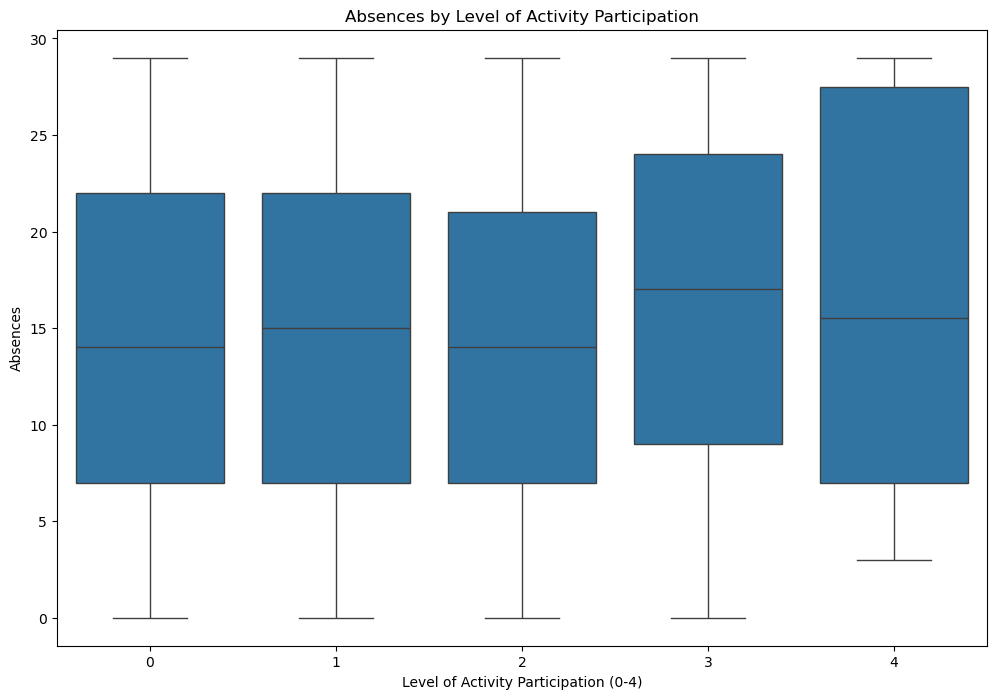

F-statistic: 1.0894260050747913
P-value: 0.36002016024995565
There is no statistically significant difference in Absences across different levels of activity participation.


In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ActivityLevel', y='Absences', data=df)
plt.title('Absences by Level of Activity Participation')
plt.xlabel('Level of Activity Participation (0-4)')
plt.ylabel('Absences')
plt.show()

# Prepare data for ANOVA
levels = df['ActivityLevel'].unique()
groups = [df[df['ActivityLevel'] == level]['Absences'] for level in levels]

# Conducting ANOVA
anova_result = stats.f_oneway(*groups)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in Absences across different levels of activity participation.")
else:
    print("There is no statistically significant difference in Absences across different levels of activity participation.")

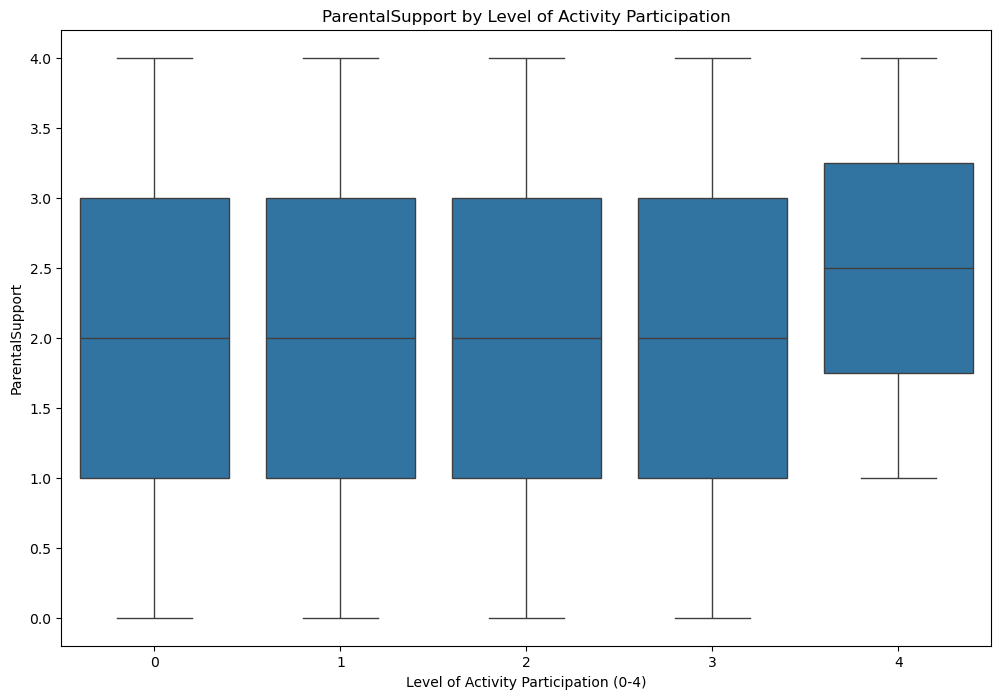

F-statistic: 0.6674555854867597
P-value: 0.6145713241961341
There is no statistically significant difference in ParentalSupport across different levels of activity participation.


In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ActivityLevel', y='ParentalSupport', data=df)
plt.title('ParentalSupport by Level of Activity Participation')
plt.xlabel('Level of Activity Participation (0-4)')
plt.ylabel('ParentalSupport')
plt.show()

# Prepare data for ANOVA
levels = df['ActivityLevel'].unique()
groups = [df[df['ActivityLevel'] == level]['ParentalSupport'] for level in levels]

# Conducting ANOVA
anova_result = stats.f_oneway(*groups)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("There is a statistically significant difference in ParentalSupport across different levels of activity participation.")
else:
    print("There is no statistically significant difference in ParentalSupport across different levels of activity participation.")

# Q3: How predict Student performance with better result?

In [66]:
model_all = smf.ols('GPA ~ Age + Gender + Ethnicity + ParentalEducation + StudyTimeWeekly + Absences + Tutoring + ParentalSupport + Extracurricular +Sports + Music + Volunteering', data=data)
result_all = model_all.fit()
result_all.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4118.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:05:25   Log-Likelihood:                 502.85
No. Observations:                2392   AIC:                            -979.7
Df Residuals:                    2379   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5974      0.061     42.407      0.000       2.477       2.717
Age                  -0.0055      0.004     -1.542      0.123      -0.013       0.002
Gender                0.0149      0.008      1.854      0.064      -0.001       0.031
Ethnicity             0.0026      0.004      0.669      0.503      -0.005       0.010
ParentalEducation     0.0017      0.004      0.432      0.666      -0.006       0.010
StudyTimeWeekly       0.0289      0.001     40.571      0.000       0.028       0.030
Absences             -0.0998      0.000   -209.572      0.000      -0.101      -0.099
Tutoring              0.2501      0.009     28.473      0.000       0.233       0.267
ParentalSupport       0.1514      0.004     42.188      0.000       0.144       0.158
Extracurricular       0.1907      0.008     23.042      0.000       0.174       0.207
Sports                0.1940      0.009     22.138      0.000       0.177       0.211
Music                 0.1431      0.010     14.121      0.000       0.123       0.163
Volunteering         -0.0085      0.011     -0.771      0.441      -0.030       0.013
==============================================================================
Omnibus:                        5.625   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.682
Skew:                          -0.112   Prob(JB):                       0.0584
Kurtosis:                       2.918   Cond. No.                         381.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

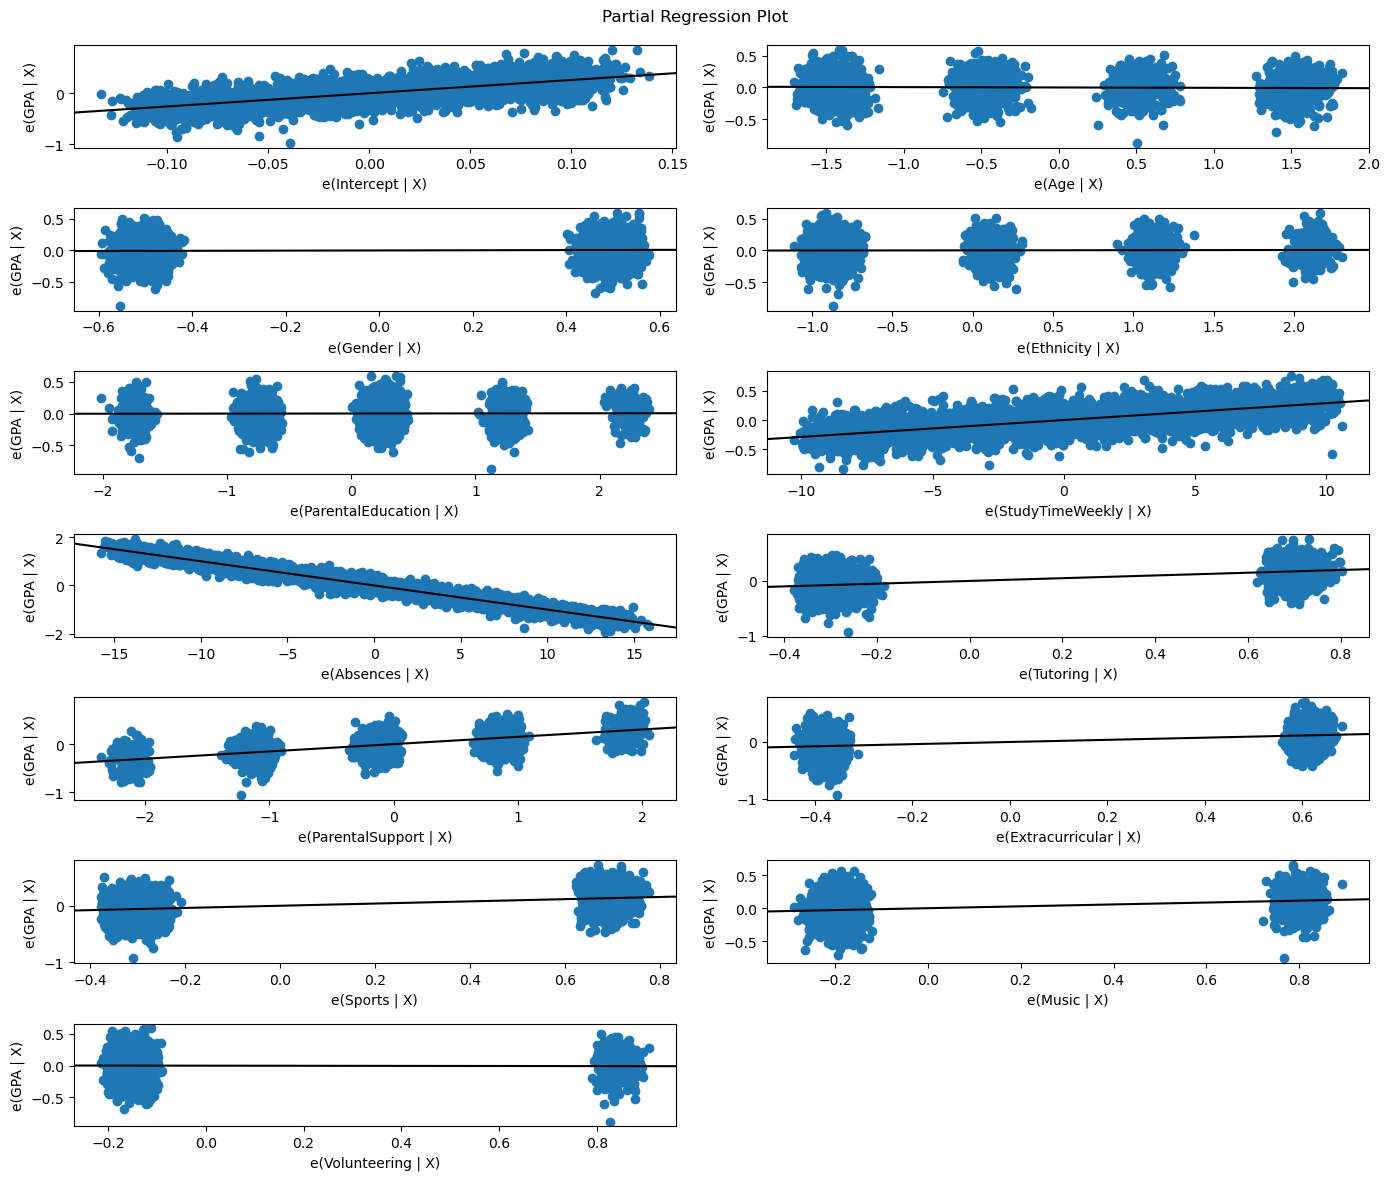

In [71]:
# big model: Use all the variables
model_all = smf.ols('GPA ~ Age + Gender + Ethnicity + ParentalEducation + StudyTimeWeekly + Absences + Tutoring + ParentalSupport + Extracurricular +Sports + Music + Volunteering', data=data)
result_all = model_all.fit()
#result_all.summary()

#draw a image of the ols model
fig = plt.figure(figsize=(14,12))
fig = sm.graphics.plot_partregress_grid(result_all, fig=fig)
#output the image with png and transparent background
plt.show()

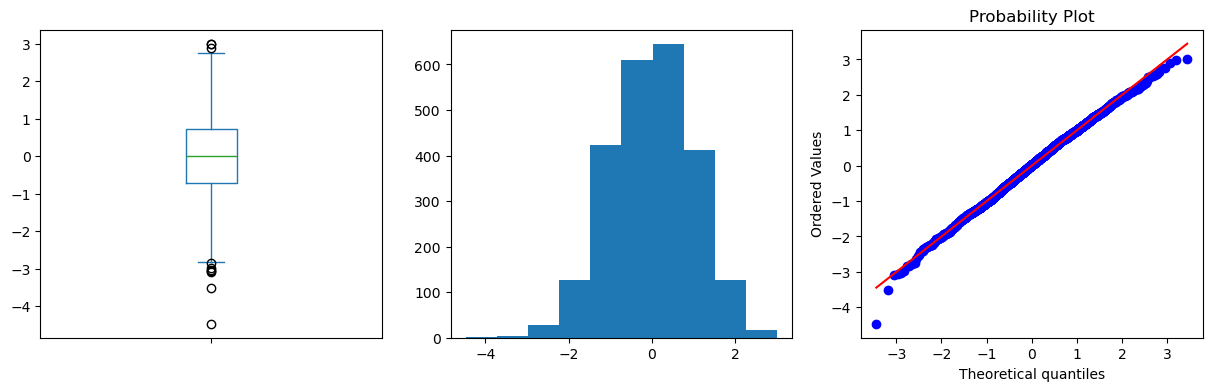

In [70]:
import inference
result_all_inf = result_all.get_influence()
result_all_star = result_all_inf.get_resid_studentized_external()
inference.check_normality(pd.Series(result_all_star))

In [76]:
#remove the outliers
data_cut = data[np.abs(result_all.resid) < 0.5]

model_allv2 = smf.ols('GPA ~  StudyTimeWeekly + Absences + Tutoring + ParentalSupport + Extracurricular +Sports + Music ', data=data_cut)
result_allv2 = model_allv2.fit()
result_allv2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     7478.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:12:06   Log-Likelihood:                 583.23
No. Observations:                2370   AIC:                            -1150.
Df Residuals:                    2362   BIC:                            -1104.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5167      0.013    187.526      0.000       2.490       2.543
StudyTimeWeekly     0.0290      0.001     41.989      0.000       0.028       0.030
Absences           -0.0995      0.000   -215.960      0.000      -0.100      -0.099
Tutoring            0.2498      0.008     29.385      0.000       0.233       0.266
ParentalSupport     0.1509      0.003     43.435      0.000       0.144       0.158
Extracurricular     0.1872      0.008     23.381      0.000       0.172       0.203
Sports              0.1964      0.008     23.146      0.000       0.180       0.213
Music               0.1453      0.010     14.810      0.000       0.126       0.165
==============================================================================
Omnibus:                       35.100   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.036
Skew:                          -0.036   Prob(JB):                     2.70e-05
Kurtosis:                       2.544   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

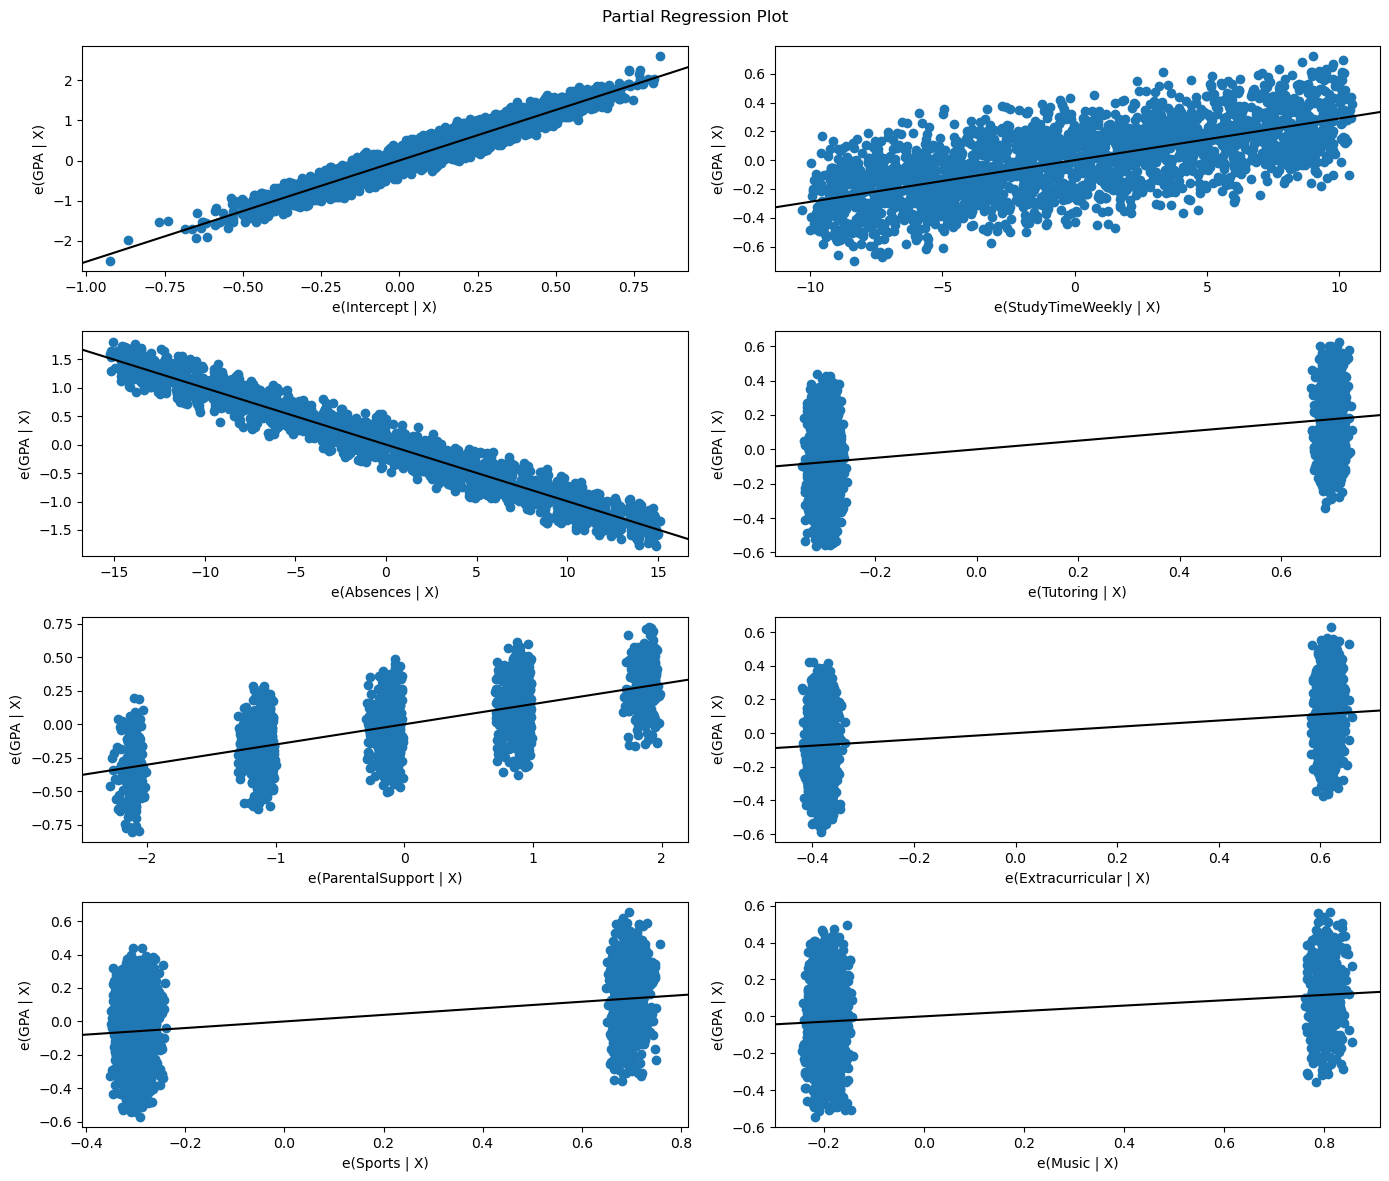

In [77]:
#draw a image of the ols model
fig = plt.figure(figsize=(14,12))
fig = sm.graphics.plot_partregress_grid(result_allv2, fig=fig)

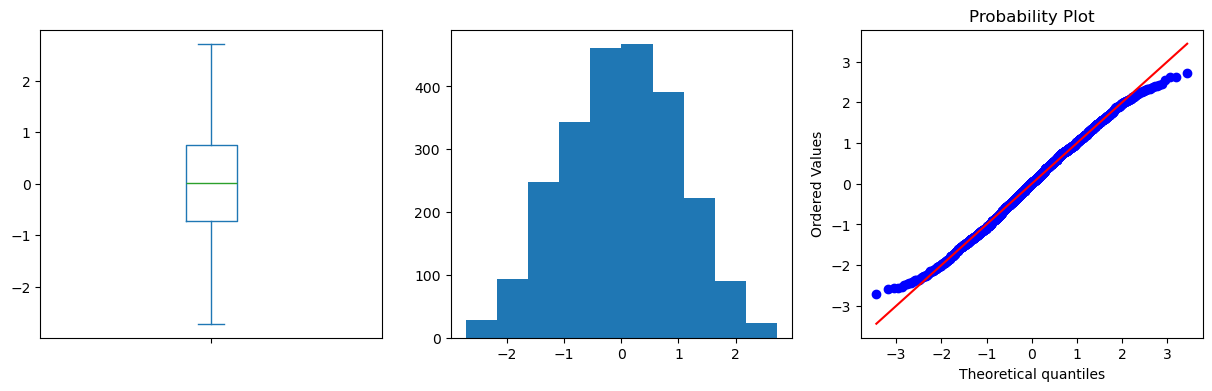

In [78]:
result_allv2_inf = result_allv2.get_influence()
result_allv2_star = result_allv2_inf.get_resid_studentized_external()
inference.check_normality(pd.Series(result_allv2_star))

In [80]:
import statsmodels.formula.api as smf

# Fit two different models
model_1 = result_allv2
model_2 = result_all

# Compare R-squared
print("Model v2 R-squared:", model_1.rsquared)
print("Model v1 R-squared:", model_2.rsquared)

# Compare Adjusted R-squared
print("Model v2 Adjusted R-squared:", model_1.rsquared_adj)
print("Model v1 Adjusted R-squared:", model_2.rsquared_adj)

# Compare AIC
print("Model v2 AIC:", model_1.aic)
print("Model v1 AIC:", model_2.aic)

# Compare BIC
print("Model v2 BIC:", model_1.bic)
print("Model v1 BIC:", model_2.bic)

# Compare F-statistic
print("Model v2 F-statistic:", model_1.fvalue)
print("Model v1 F-statistic:", model_2.fvalue)

# Check p-values of the coefficients
print("Model v2 significant coefficients (p < 0.05):")
print(model_1.params[model_1.pvalues < 0.05])
print("Model v1 significant coefficients (p < 0.05):")
print(model_2.params[model_2.pvalues < 0.05])

Model v2 R-squared: 0.9568254028026836
Model v1 R-squared: 0.9540672641046402
Model v2 Adjusted R-squared: 0.9566974509904985
Model v1 Adjusted R-squared: 0.9538355731291276
Model v2 AIC: -1150.4656066090156
Model v1 AIC: -979.6928687636228
Model v2 BIC: -1104.3004447359822
Model v1 BIC: -904.554362267706
Model v2 F-statistic: 7478.013687047085
Model v1 F-statistic: 4117.843873694711
Model v2 significant coefficients (p < 0.05):
Intercept          2.516656
StudyTimeWeekly    0.028962
Absences          -0.099532
Tutoring           0.249769
ParentalSupport    0.150868
Extracurricular    0.187221
Sports             0.196442
Music              0.145329
dtype: float64
Model v1 significant coefficients (p < 0.05):
Intercept          2.597383
StudyTimeWeekly    0.028910
Absences          -0.099787
Tutoring           0.250147
ParentalSupport    0.151445
Extracurricular    0.190706
Sports             0.194028
Music              0.143074
dtype: float64


In [82]:
SSE_all = np.sum(model_1.resid ** 2)
SSE_allv2 = np.sum(model_2.resid ** 2)
print("Model v2 R-SSE:", SSE_all)
print("Model v1 R-SSE:", SSE_allv2)

Model v2 R-SSE: 84.8248537789481
Model v1 R-SSE: 91.97969867611081


In [118]:
X = data[['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music']]
y = data['GPA']

clf = tree.DecisionTreeRegressor(max_depth=6)
clf_8 = tree.DecisionTreeRegressor(max_depth=8)
clf = clf.fit(X, y)
clf_8 = clf_8.fit(X, y)
#fig, ax = plt.subplots(figsize=(12, 12))
#ignore the Squared error and value in the plot
#tree.plot_tree(clf, feature_names=X.columns, filled=False, fontsize=5)
#plt.show()

In [119]:
#calculate the SSE for the decision tree model
y_pred = clf.predict(X)
SSE_tree = np.sum((y - y_pred) ** 2)
y_pred8 = clf_8.predict(X)
SSE_tree8 = np.sum((y - y_pred8) ** 2)
print("Model v2 R-SSE:", SSE_all)
print("Model v1 R-SSE:", SSE_allv2)
print("Model Decision Tree depth=6 R-SSE:", SSE_tree)
print("Model Decision Tree depth=8 R-SSE:", SSE_tree8)

Model v2 R-SSE: 84.8248537789481
Model v1 R-SSE: 91.97969867611081
Model Decision Tree depth=6 R-SSE: 171.53377660661033
Model Decision Tree depth=8 R-SSE: 102.07861901962055


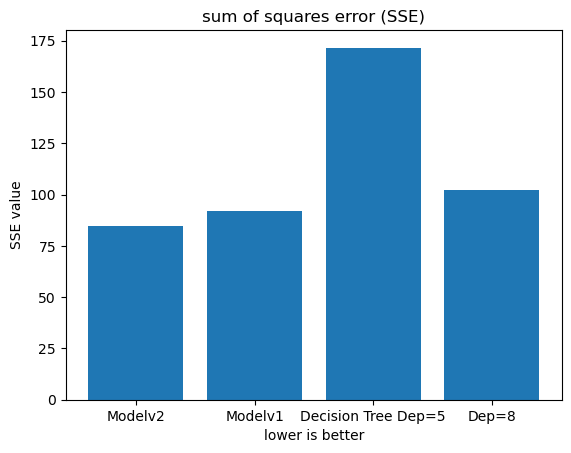

In [120]:
SSElist = [SSE_all, SSE_allv2, SSE_tree,SSE_tree8]
plt.xlabel('lower is better')
plt.ylabel('SSE value')
plt.title('sum of squares error (SSE)')
plt.bar(["Modelv2","Modelv1","Decision Tree Dep=5","Dep=8"],SSElist)
plt.savefig('SSE.png', transparent=True)